# Exploratory Data Analysis

In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
old = pd.read_csv("~/tree_stats_old.csv")
old['filename'] = [f.split('/')[-1].replace('.tree','') for f in old['filename']]
old['filename'].head()

0    isolet-0.029124389234364945-51.0
1    isolet-0.019709755429897613-97.0
2    isolet-0.01700358750088582-110.0
3    isolet-0.01514502952618002-131.0
4      isolet-0.09007779995745424-4.0
Name: filename, dtype: object

In [3]:
old.head()

,exp,prod,sum,const,nodes,unique_feats,filename,algo
0,525,204,237,1214,2180,511,isolet-0.029124389234364945-51.0,OLD
1,175,77,54,408,714,283,isolet-0.019709755429897613-97.0,OLD
2,364,131,114,767,1376,422,isolet-0.01700358750088582-110.0,OLD
3,649,254,243,1465,2611,569,isolet-0.01514502952618002-131.0,OLD
4,65,49,15,132,261,79,isolet-0.09007779995745424-4.0,OLD


In [4]:
new = pd.read_csv("~/tree_stats_new.csv")
new['filename'] = [f.split('/')[-1].replace('.tree','') for f in new['filename']]
new['filename'].head()

0         dermatology-1.9274290721875345-2.0
1    dermatology-0.014798781566773389-1650.0
2        dermatology-0.0683997320458048-40.0
3     dermatology-0.017556308298995793-127.0
4       dermatology-0.15004626001668397-28.0
Name: filename, dtype: object

In [5]:
new.head()

,exp,prod,sum,const,nodes,unique_feats,filename,algo
0,0,0,0,1,1,1,dermatology-1.9274290721875345-2.0,NEW
1,10,3,14,38,65,28,dermatology-0.014798781566773389-1650.0,NEW
2,1,0,3,14,18,13,dermatology-0.0683997320458048-40.0,NEW
3,7,0,5,26,38,23,dermatology-0.017556308298995793-127.0,NEW
4,1,0,1,8,10,7,dermatology-0.15004626001668397-28.0,NEW


In [6]:
accs = pd.read_csv("~/Downloads/classified-results.csv")
# let's strip extensions
accs['filename'] = accs['filename'].str.replace(".csv", "").str.replace(".gz","")

/var/folders/zs/6zsxtw5j5478tm1p8_9s5n9c0000gn/T/ipykernel_857/1675572528.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  accs['filename'] = accs['filename'].str.replace(".csv", "").str.replace(".gz","")


In [7]:
accs.head()

,filename,method,rf_accuracy,knn_accuracy
0,COIL20-0.1200249529584918-1.0,gpmalmo,0.371607,0.392768
1,COIL20-0.08477932409270494-2.0,gpmalmo,0.673571,0.650000
2,COIL20-0.061748546836574436-3.0,gpmalmo,0.687768,0.688661
3,COIL20-0.04507427667859071-4.0,gpmalmo,0.795804,0.792411
4,COIL20-0.04088139950815972-5.0,gpmalmo,0.860536,0.838571


In [93]:
#let's integrate all of the dataframes together
df = pd.concat([old,new], axis=0)
merged = pd.merge(df, accs, on='filename')
merged.head()

,exp,prod,sum,const,nodes,unique_feats,filename,algo,method,rf_accuracy,knn_accuracy
0,525,204,237,1214,2180,511,isolet-0.029124389234364945-51.0,OLD,gpmalmo,0.866026,0.791667
1,175,77,54,408,714,283,isolet-0.019709755429897613-97.0,OLD,gpmalmo,0.904487,0.863462
2,364,131,114,767,1376,422,isolet-0.01700358750088582-110.0,OLD,gpmalmo,0.912179,0.867949
3,649,254,243,1465,2611,569,isolet-0.01514502952618002-131.0,OLD,gpmalmo,0.907692,0.872436
4,65,49,15,132,261,79,isolet-0.09007779995745424-4.0,OLD,gpmalmo,0.580128,0.536538


In [236]:
var_dict={'unique_feats':'Unique Feats', 'nodes':'# Nodes'}

def make_plot(df, dataset, col='nodes', size='big'):
    df = df[df['filename'].str.contains(dataset)]
    df_old = df[df['algo']=='OLD']
    df_new = df[df['algo']=='NEW']
    # Assume that the dataframe is called 'df'
    if size=='big':
        fig, ax = plt.subplots(figsize=(10,8))
        plt.xticks(fontsize=40)
        plt.yticks(fontsize=40)
        ax.scatter(df_new[col], df_new['rf_accuracy'], label="GPEMaL", color='orange', marker='x', alpha=1.0, s=500)
        ax.scatter(df_old[col], df_old['rf_accuracy'], label="GPMaLMO", alpha=1.0, marker='o', facecolors='none', edgecolors='b', s=500)
    else: #small
        fig, ax = plt.subplots(figsize=(10,8))
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax.scatter(df_new[col], df_new['rf_accuracy'], label="GPEMaL", color='orange', marker='x', alpha=0.65, s=60)
        ax.scatter(df_old[col], df_old['rf_accuracy'], label="GPMaLMO", alpha=0.5, marker='o', facecolors='none', edgecolors='b', s=60)
        ax.legend(fontsize=20)
    if col=='nodes':
        ax.set_xscale('log')
    ax.set_xlabel(var_dict[col], fontsize=20)
    # COIL20: #Nodes vs RF Test Accuracy
    ax.set_title(f"{dataset.capitalize()}: {var_dict[col]} vs RF Test Accuracy", fontsize=20)
    ax.set_ylabel('RF Accuracy', fontsize=20)
    plt.tight_layout()
    plt.show()  # show the plot

<IPython.core.display.Javascript object>


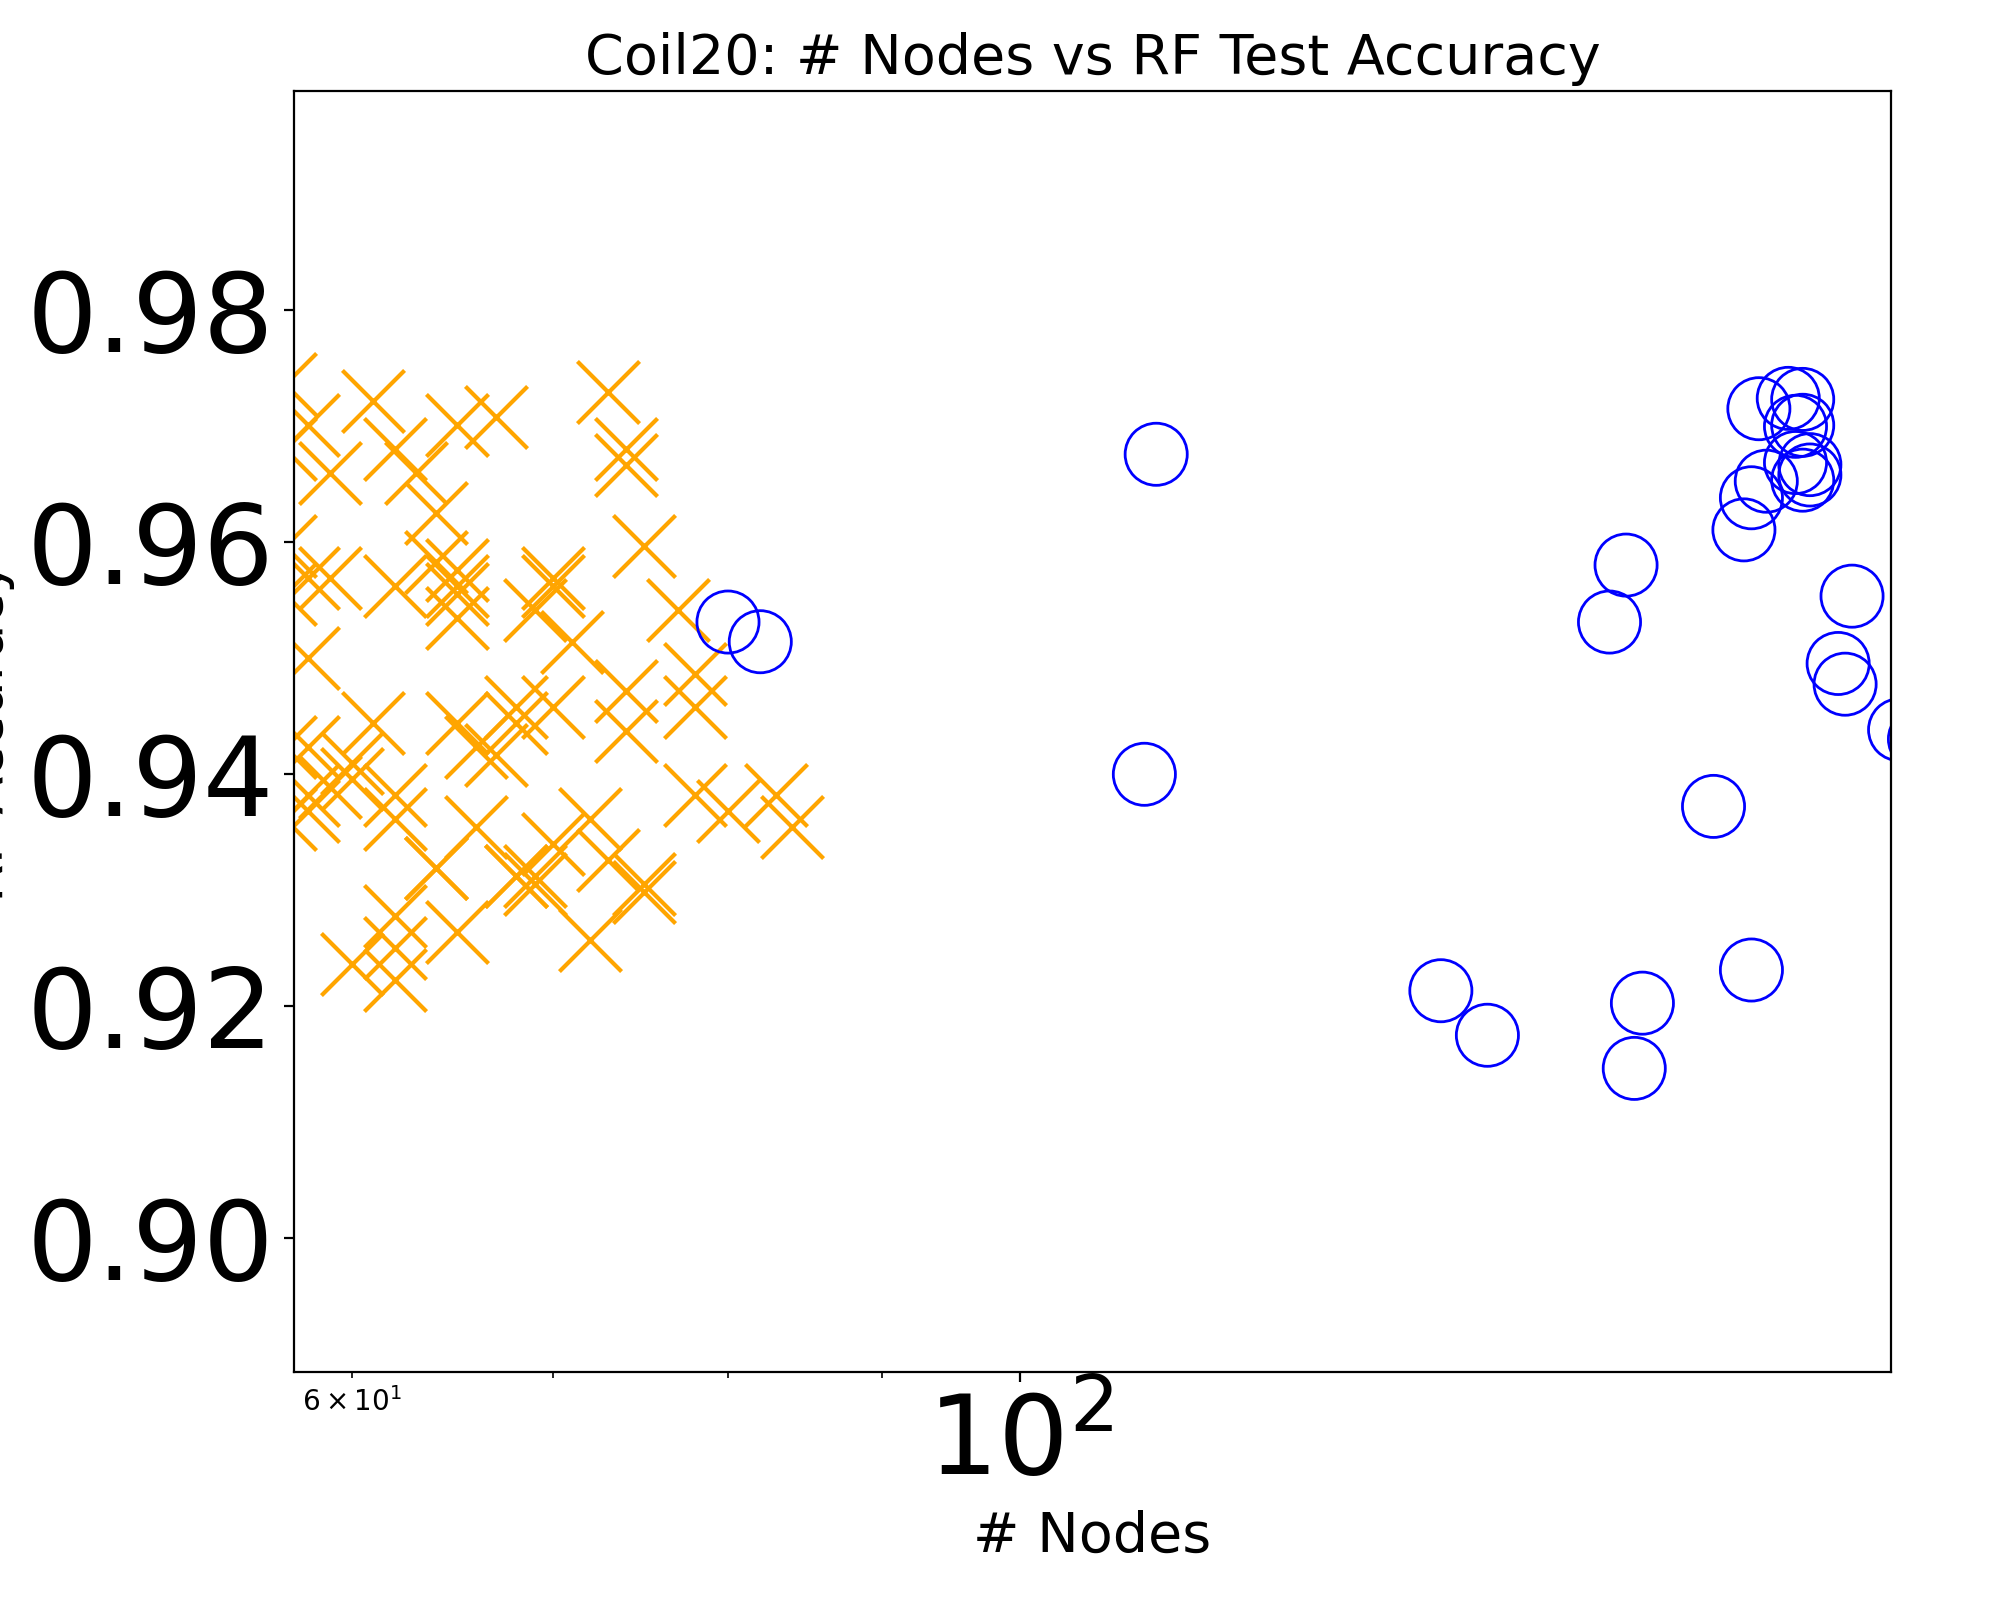

<IPython.core.display.Javascript object>


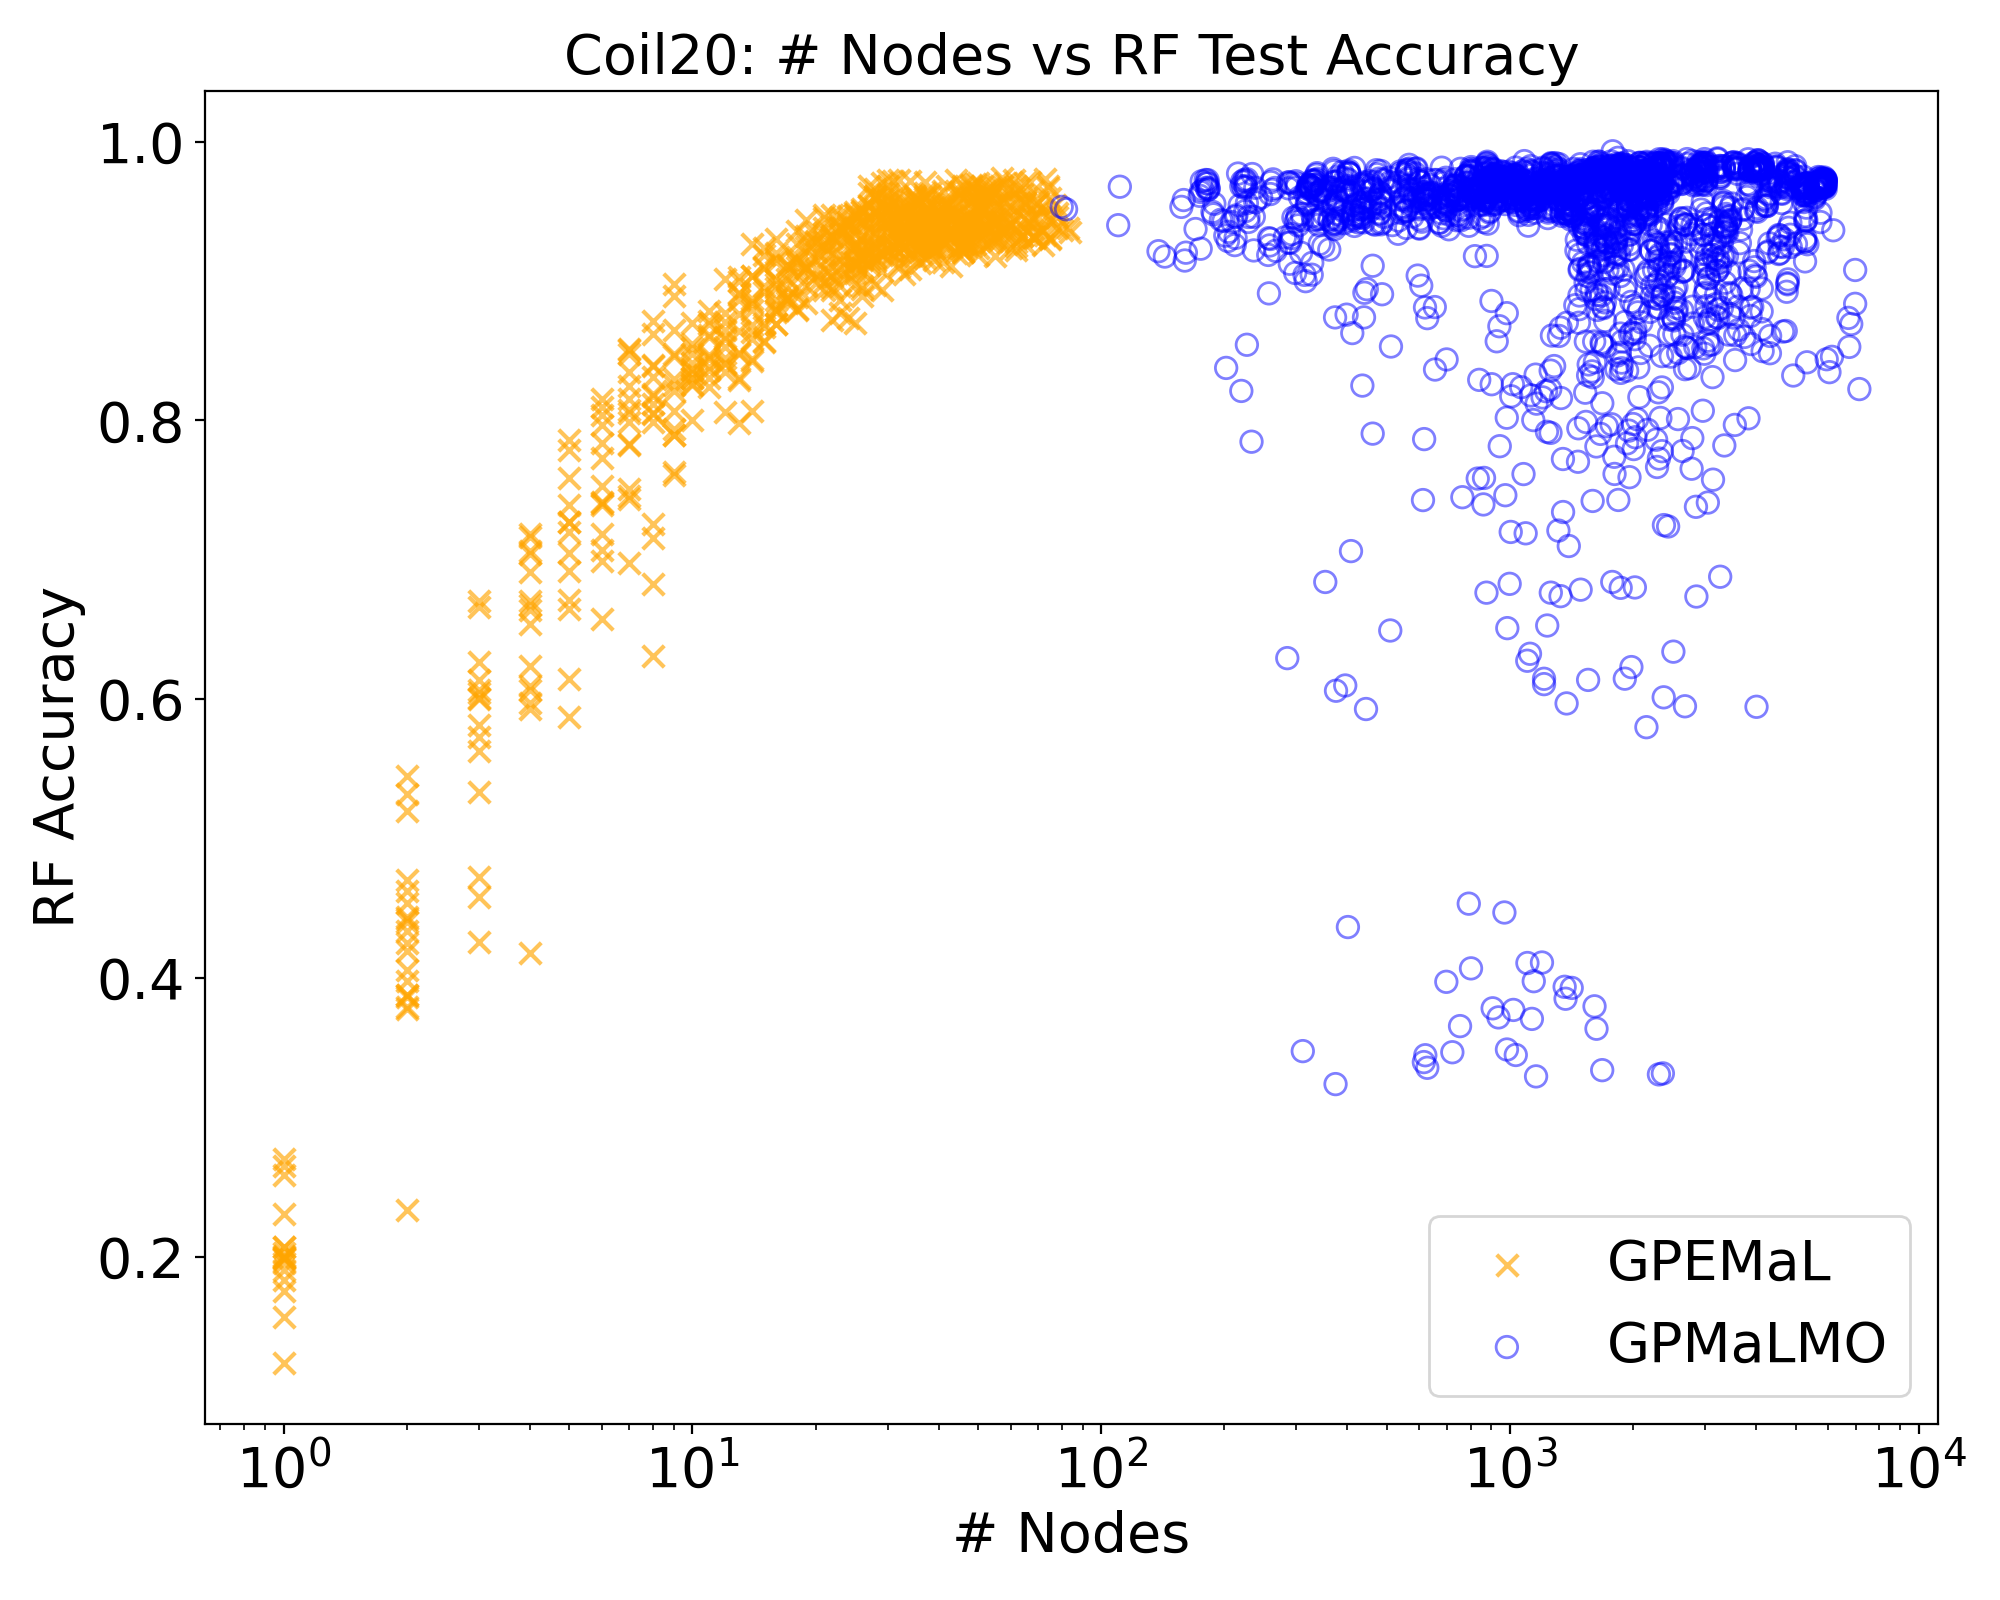

In [237]:
%matplotlib notebook
for dataset in ['COIL20']:#,'dermatology', 'wine', 'isolet', 'image-segmentation']:
    make_plot(merged, dataset, 'nodes', 'big')
    make_plot(merged, dataset, 'nodes', 'small')
    #make_plot(merged, dataset, 'unique_feats', 'big')
    #make_plot(merged, dataset, 'unique_feats', 'small')